In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

/Users/thomasnilsson/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/thomasnilsson/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/Users/thomasnilsson/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/Users/thomasnilsson/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    

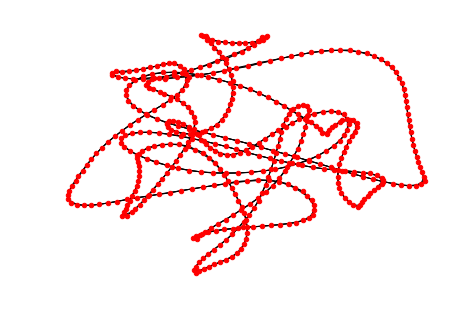

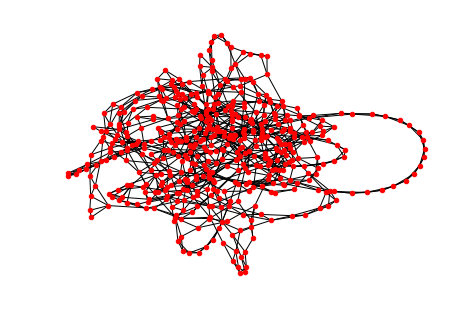

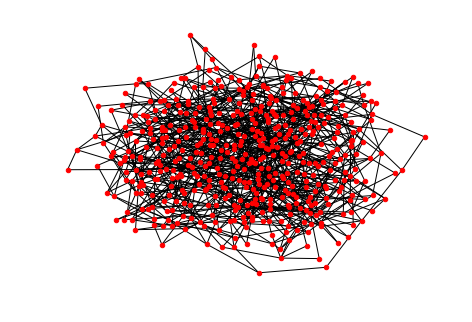

In [2]:
N, k_e, p = 500, 4, [0, 0.1, 1]
G1 = nx.watts_strogatz_graph(N, k_e, p[0])
G2 = nx.watts_strogatz_graph(N, k_e, p[1])
G3 = nx.watts_strogatz_graph(N, k_e, p[2])

nx.draw(G1, node_size=20)
plt.show()

nx.draw(G2, node_size=20)
plt.show()

nx.draw(G3, node_size=20)
plt.show()

In [31]:
import random

def flatten_edgelist(graph):
    return list(sum(graph.edges(), ()))

def get_degrees(G):
    return sorted([d for n, d in G.degree()], reverse=True)
    
def BA_graph(N):
    # Create initial two nodes, with one link between them
    G = nx.Graph()
    G.add_edges_from([(0,1)])
    
    # Create the remaining N-2 nodes. Link based on degree
    for node in range(2, N):
        edges = flatten_edgelist(G)
        pick = random.choice(edges)
        G.add_edges_from([(node, pick)])
    
    return G

/Users/thomasnilsson/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/thomasnilsson/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/Users/thomasnilsson/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/Users/thomasnilsson/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
/Use

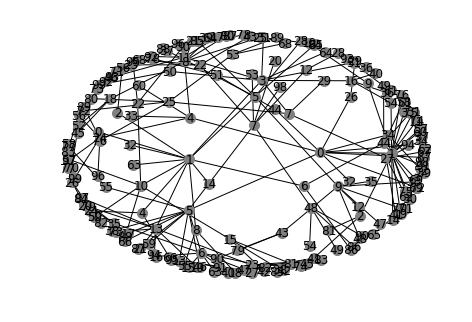

In [33]:
ba_graph_100 = BA_graph(100)
nx.draw(ba_graph_100, with_labels=True, node_color="gray", node_size=100)
plt.show()

In [53]:
def degree_list(G):
    return np.array(list(G.degree()))

In [54]:
k_avg_neighbors = np.mean(degree_list(ba_graph_100))

In [55]:
k_avg_neighbors

49.5

In [ ]:
nodes = list(ba_graph_100.nodes)
N = 0 # Number of times neighbors have more friends on avg
for _ in range(1000):
    node = random.choice(nodes)
    neighbors = list(ba_graph_100.neighbors(node))
    k_avg_neighbors = np.mean(dict(ba_graph_100.degree(neighbors)).values())
    k_node = ba_graph_100.degree(node)
    if k_node < k_avg_neighbors:
        N += 1
        
print("Friendship paradox holds:", N, "/ 1000 times")

In [61]:
nodes = list(ba_graph_100.nodes())
N = 0 # Number of times neighbors have more friends on avg
for _ in range(1000):
    node = random.choice(nodes)
    neighbors = list(ba_graph_100.neighbors(node))
    neighbor_degrees = np.array(list(ba_graph_100.degree(neighbors)))
    k_avg_neighbors = np.mean(neighbor_degrees)
    k_node = ba_graph_100.degree(node)
    if k_node < k_avg_neighbors:
        N += 1
        
print("Friendship paradox holds:", N, "/ 1000 times")

Friendship paradox holds: 958 / 1000 times


In [62]:
ba_graph_5k = BA_graph(5000)

In [63]:
degrees_5k = np.array(list(ba_graph_5k.degree()))

In [64]:
print("maximum =", np.max(degrees_5k))
print("minimum =", np.min(degrees_5k))

maximum = 4999
minimum = 0


In [65]:
def hist_to_scatter(degrees):
    v = range(min(degrees), max(degrees)+1)
    hist = np.histogram(degrees, bins=v)
    freqs, edges = hist[0], hist[1]
    n = freqs.size
    means = [(edges[i] + edges[i+1]) / 2 for i in range(n)]
    return freqs, means

def plot_degree_distribution(degrees):
    freqs, means = hist_to_scatter(degrees)
    plt.subplot(2,1,1)
    plt.plot(means, freqs, ".")
    plt.xlabel("k")
    plt.ylabel("frequency")

    plt.subplot(2,1,2)
    plt.loglog(means, freqs, ".")
    plt.xlabel("k")
    plt.ylabel("frequency")

    plt.show()

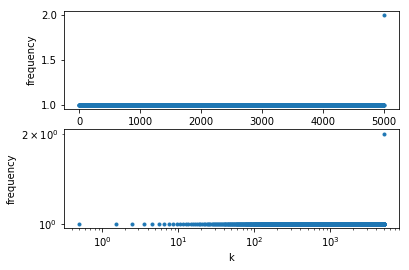

In [66]:
plot_degree_distribution(degrees_5k)

In [68]:
len(ba_graph_5k.degree())

5000